In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab03.ok')

Assignment: lab03
OK, version v1.13.11



# Lab 3: Exploring Summary Statistics and Loss Functions

In this lab, you will:

1. Define loss functions and find their minimum values.
2. Explore different statistics and techniques for optimization.

**This assignment should be completed and submitted before 11:59 PM on Monday Sep 9, 2019.**


### Collaboration Policy

Data science is a collaborative activity. While you may talk to others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

*List collaborators here*

# Loss Functions

A loss function is a measure of how well a model is able to predict the expected outcome. In other words, it measures the deviations of the predicted values from the observed values. In this lab we will implement the squared loss and absolute loss functions.  

In the formulations below *y* represents the observed values and *c* stands for some constant value representing a summary statistic.

1. **Squared Loss** (also known as the $L^2$ loss pronounced "ell-two"):

$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, c \right) = \left( y - c\right)^2
$$

2. **Absolute Loss** (also known as the $L^1$ loss pronounced "ell-one"):

$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, c \right) = \left| y - c \right|
$$

## Setup

In [2]:
# Run this cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Squared Loss

## Question 1a: Implement the squared loss function


$$\Large
L\left(y,  c\right) = \left( y - c \right)^2
$$

Using the comments below, implement the squared loss function. Your answer should not use any loops.

<!--
BEGIN QUESTION
name: q1a
-->

In [3]:
def squared_loss(y_obs, c):
    """
    Calculate the squared loss of the observed data and a summary statistic.
    
    Parameters
    ------------
    y_obs: an observed value
    c : some constant representing a summary statistic
    
    Returns
    ------------
    The squared loss between the observation and the summary statistic.
    """
    return (y_obs-c)**2

In [4]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



## Question 1b: Plotting the Squared Loss

Let us now consider the case where `y_obs` equals 10. For arbitrary values of `c`, plot the squared loss using the function you implemented in the previous question. Don't forget to label your graph.

<!--
BEGIN QUESTION
name: q1b
manual: true
-->
<!-- EXPORT TO PDF -->

Text(0.5, 0, 'C Value')

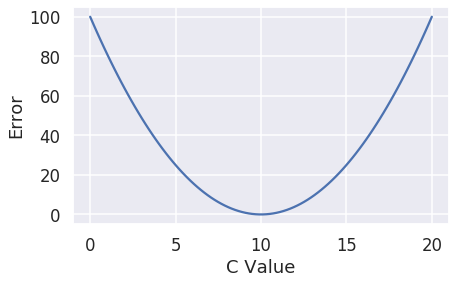

In [5]:
y_obs = 10
c_values = np.linspace(0, 20, 100) # some arbitrary values of c

squared_loss_func = squared_loss(y_obs, c_values)

plt.plot(c_values, squared_loss_func)
plt.ylabel('Error')
plt.xlabel('C Value')

## Question 2: Mean Squared Error for the Tips Data

Let's apply our knowledge to some real world data. Below you are given an array of tips from a restaurant. In this section, you will try to find the best statistic to represent the tips given in the array. The simple procedure you will use in this lab includes constructing the mean squared error (MSE) for the tips data and finding the value that minimizes the MSE. 

In [6]:
# Run this cell, do not change anything
df = sns.load_dataset("tips")
tips = np.array(df['tip']) # array of observed tips

Now, we can extend the above loss functions to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large\mathcal{D} = \{x_1, \ldots, x_n\}$$

where $x_i$ is the $i^{th}$ tip.

We can define the average loss over the dataset as:

$$\Large
L\left(c, \mathcal{D}\right) = \frac{1}{n} \sum_{i=1}^n L(x_i, c)
$$

Define the `mean_squared_error` function which computes the mean squared error given the data and a value for `c`.

<!--
BEGIN QUESTION
name: q2a
manual: false
-->

In [7]:
def mean_squared_error(c, data):
    return sum(squared_loss(data, c))/len(data)

mean_squared_error(5.3, tips)

7.204529508196728

In [8]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In the cell below plot the mean squared error for different `c` values. Note that `c_values` are given. Make sure to label the axes on your plot. Remember to use the `tips` variable we defined earlier.

<!--
BEGIN QUESTION
name: q2b
manual: true
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Mean Error')

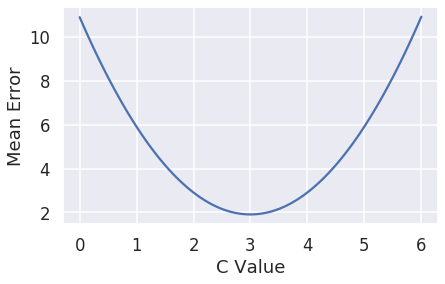

In [9]:
c_values = np.linspace(0, 6, 100)

list = []
for c in c_values:
    list.append(mean_squared_error(c, tips))
    
plt.plot(c_values, list)
plt.xlabel('C Value')
plt.ylabel('Mean Error')

Find the value of `c` that minimizes the L2 loss above via observation of the plot you've generated. Round your answer to the nearest integer.

<!--
BEGIN QUESTION
name: q2c
-->

In [10]:
min_observed_mse = 3
min_observed_mse

3

In [11]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 3: Find the Minimizing Value for Our Tips Dataset

The cell below plots some arbitrary 4th degree polynomial function. 

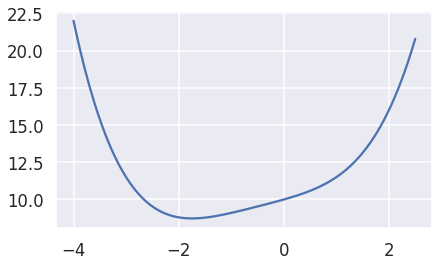

In [12]:
x_values = np.linspace(-4, 2.5, 100)

def fx(x):
    return 0.1 * x**4 + 0.2*x**3 + 0.2 * x **2 + 1 * x + 10

plt.plot(x_values, fx(x_values))

By looking at the plot, we see that the x which minimizes the function is slightly larger than -2. What if we want the exact value?

The function `minimize` from [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) will attempt to minimize any function you throw at it.

Try running the cell below, and you will see that minimize seems to get the answer correct.

Note: For today, we'll let minimize work as if by magic. We'll discuss how `minimize` works later in the course.

In [13]:
from scipy.optimize import minimize
minimize(fx, x0 = 1.1)

      fun: 8.728505719866614
 hess_inv: array([[0.50884886]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([-1.74682779])

The `fun` value is the minimum value of the function. The `x` is the x which minimizes the function. We can index into the object returned by `minimize` to get these values. We have to add the additional `[0]` at the end because the minimizing x is returned as an array. The reason for this is that `minimize` can also minimize multivariable functions.

In [14]:
minimization_result_for_fx = minimize(fx, x0 = 0)
min_of_fx = minimization_result_for_fx['fun']
x_which_minimizes_fx = minimization_result_for_fx['x'][0]

The parameter `x0` that we passed to the `minimize` function is where the `minimize` function starts looking as it tries to find the minimum. For example, above, `minimize` started its search at x = 1.1 because that's where we told it to start. For the function above, it doesn't really matter what x we start at because the function is nice and has only a single local minimum. More technically, the function is nice because it is [convex](https://en.wikipedia.org/wiki/Convex_function), a property of functions that we will discuss later in the course.

`minimize` isn't perfect. For example, if we give it a function with many valleys (also known as local minima) it can get stuck. For example, consider the function below:

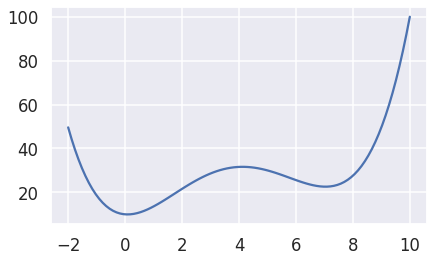

In [15]:
w_values = np.linspace(-2, 10, 100)

def fw(w):
    return 0.1 * w**4 - 1.5*w**3 + 6 * w **2 - 1 * w + 10

plt.plot(w_values, fw(w_values))

If we start the minimization at w = 6.5, we'll get stuck in the local minimum at w = 7.03. Note that no matter what your actual variable is called in your function, the `minimize` routine still calls the starting point `x0`.

In [16]:
minimize(fw, x0 = 6.5)

      fun: 22.594302881719713
 hess_inv: array([[0.12308018]])
      jac: array([-3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([7.03774624])

Now using the `minimize function`, find the value of `c` that minimizes the mean squared error for our tips dataset. In other words, you want to find the exact minimum of the plot that you generated in question 2.

For autograding purposes, assign `min_scipy` to the value of `c` that minimizes the MSE according to the `minimize` function.

Hint: You can't pass your `mean_squared_error` function to `minimize` because `mean_squared_error` has two variables: `c` and `data`. `minimize` will get confused because it thinks it needs to minimize by picking the best `c` and best `data` values. We only want it to play around with `c`.

In other words, you need to pass a function of one variable `c` to the `minimize` function, which means you'll need to create a new function of only ONE variable `c`. This is very simple, but also very tricky when you do this for the first time. Make sure to ask for help if you get stuck.

<!--
BEGIN QUESTION
name: q3a
-->

In [17]:
def mean_squared_error_helper(c):
    return mean_squared_error(c, tips)

min_scipy = minimize(mean_squared_error_helper, x0=0.0)['x'][0] 
min_scipy

2.9982777037277204

In [18]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



From lecture we know that the value of `c` that minimizes the mean squared error is the average of the data. Assign `min_computed` to the mean of the tips dataset, and compare this to the values you observed in questions 2b and 3a.

<!--
BEGIN QUESTION
name: q3b
-->

In [19]:
min_computed = sum(tips)/len(tips)
min_computed

2.9982786885245902

In [20]:
ok.grade("q3b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Reflecting on the lab so far, we've now seen 3 ways to find the summary statistic `c` that minimizes the mean squared error:
1. Create a plot of the MSE for the given data array vs. `c` and eyeball the minimizing `c`.
2. Create a function that returns the MSE for a specific data array as a function of `c` and use the scipy `minimize` function to find the exact `c` which minimizes this function.
3. Simply compute the mean of the data array.

At this point, you've hopefully convinced yourself that the `mean` is the summary statistic that minimizes mean squared error.

# Absolute Loss

## Question 4: Implement the Absolute Loss 

In this section, you will follow the exact same steps as above but for the absolute loss function. Absolute loss is defined as:

$$\Large
L\left(y, c\right) = \left| y - c\right|
$$

<!--
BEGIN QUESTION
name: q4a
-->
In the cell below define the function `abs_loss` which returns the absolute loss given a value of `c` and `y_obs`. 

In [21]:
def abs_loss(c, y_obs):
    return abs(y_obs-c)

In [22]:
ok.grade("q4a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



## Question 4b: Plotting the Absolute Loss

In the cell below, plot the absolute loss for different values of `c`. Note that the values of `c` have already been given to you.

<!--
BEGIN QUESTION
name: q4b
-->

Text(0, 0.5, 'Error')

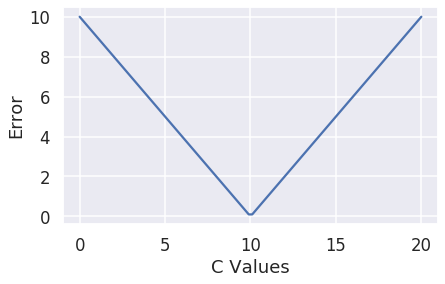

In [23]:
y_obs = 10
c_values = np.linspace(0, 20, 100) # some arbitrary values of c

values = []
for c in c_values:
    values.append(abs_loss(c, y_obs))
plt.plot(c_values, values)
plt.xlabel('C Values')
plt.ylabel('Error')

## Question 5: Mean Absolute Error for the Tips Data

Define the `mean_absolute_error` function which computes the mean absolute error given the data and a value for `c`.

<!--
BEGIN QUESTION
name: q5a
-->

In [24]:
def mean_absolute_error(c, data):
    return sum(abs_loss(c, data))/len(data)

mean_absolute_error(5.3, tips)

2.4527868852459034

In [25]:
ok.grade("q5a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In the cell below plot the mean absolute error for different `c` values and the `tips` dataset. Note that `c_values` are given. Make sure to label the axes on your plot.

<!--
BEGIN QUESTION
name: q5b
manual: true
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Mean Error')

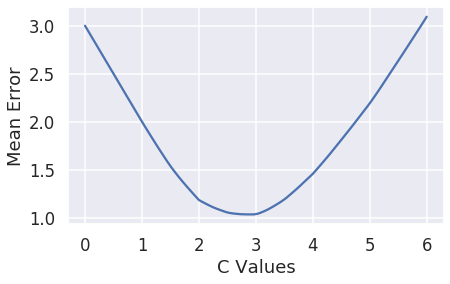

In [26]:
c_values = np.linspace(0, 6, 100)

mean_absolute_error_values = []

for c in c_values:
    mean_absolute_error_values.append(mean_absolute_error(c, tips))
plt.plot(c_values, mean_absolute_error_values)
plt.xlabel('C Values')
plt.ylabel('Mean Error')

You should see that the plot looks somewhat to the plot of the mean squared error. Try to identify any key differences you observe and write them down below. This might be more fun with a partner. Note, your answer will not be graded, so don't worry about writing a detailed answer. If you want to see our answer, see the very end of this lab notebook.

The graph seems to be shifted to the left a little bit, and not completely symmetric with the left hand side seeming to be a line, with a sharp curve at the C Value of 2.

To minimize the function, let's zoom in closer to the minimizing c. Plot the mean absolute error again using the given `c_values` below.

<!--
BEGIN QUESTION
name: q5c
manual: true
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Mean Error')

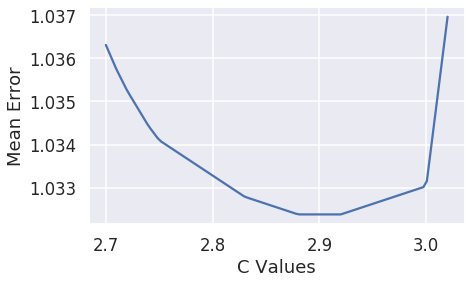

In [27]:
c_values = np.linspace(2.7, 3.02, 100)

mean_absolute_error_values = []

for c in c_values:
    mean_absolute_error_values.append(mean_absolute_error(c, tips))
plt.plot(c_values, mean_absolute_error_values)
plt.xlabel('C Values')
plt.ylabel('Mean Error')


This time, observe that the function is piecewise linear and has a slope of zero near its minimum. Because of the large flat region at the minimum, there are multiple values of `c` that minimize the L1 loss.

Give a `c` rounded to the nearest tenth that minimizes L1 loss. By "rounded to the nearest tenth" we mean you'd say 7.6 instead of 7.55.

<!--
BEGIN QUESTION
name: q5d
-->

In [28]:
min_observed_mae = 2.9
min_observed_mae

2.9

In [29]:
ok.grade("q5d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 6: Find the Minimizing Value Using Absolute Error

As before, we will use the `minimize` function to find a solution. Assign `min_abs_scipy` to the value of `c` that minimizes the MAE according to the `minimize` function for the `tips` data. Note: Depending on the `x0` value you specify, you will get different results! 

Extra: Try various `x0` values and record the different outputs you get from `minimize`. Use the plot you created above to verify that these are all valid minimizing statistics.

<!--
BEGIN QUESTION
name: q6a
-->

In [30]:
def mean_absolute_error_helper(c):
    return mean_absolute_error(c, tips)

min_abs_scipy = minimize(mean_absolute_error_helper, x0=2.9)['x'][0]
min_abs_scipy

2.9

In [31]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Just like the MSE, there are three ways to compute the summary statistic `c` that minimizes the MAE:
1. Create a plot of the MAE for the given data array vs. `c` and eyeball a minimizing `c`.
2. Create a function that returns the MAE for a specific data array as a function of `c` and use the scipy `minimize` function to find an exact `c` which minimizes this function.
3. Simply compute the ?????? of the data array.

Try to figure out what to substitute in for the ?????? above. To this, try out various statistics functions provided by `np`. A list and documentation is available at [https://docs.scipy.org/doc/numpy/reference/routines.statistics.html](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html).

Assign `min_abs_computed` to the correct summary statistic using method `#3` from the previous problem.

<!--
BEGIN QUESTION
name: q6b
-->

In [32]:
min_abs_computed = np.median(tips)
min_abs_computed

2.9

In [33]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# Extra Notes

#### Our Observations on Differences Between MAE vs. MSE

Earlier in this lab, we said we'd describe our observations about the differences between the MAE and MSE.

There are three key differences that we identified between the plots of the MSE and MAE.

1. The minimizing c is different (slightly smaller for MAE).
2. The plot for MAE increases linearly instead of quadratically as we move far away from the minimizing c.
3. The plot for MAE is piecewise linear instead of smooth. Each change in slope happens at the same c value as a data point in our dataset.

## Submission

**Important**: To make sure the test cases run correctly, click `Kernel>Restart & Run All` and make sure all of the test cases are still passing. Doing so will submit your code for you. 

If your test cases are no longer passing after restarting, you may be missing a variable, or modifications you'd made may not have been recorded (perhaps because you deleted a cell). 

You may submit this assignment as many times as you'd like before the deadline.

**You must restart and run all cells before submitting. Otherwise, you may pass test cases locally, but not on our servers. We will not entertain regrade requests of the form, “my code passed all of my local test cases, but failed the autograder”.**

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 4 EXPORTED QUESTIONS -->

In [34]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('lab03.ipynb', 'lab03.pdf')
ok.submit()

Generating PDF...
Saved lab03.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

ERROR  | auth.py:91 | {'error': 'invalid_grant'}


Saved 'lab03.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: kpusztai@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: hRmJ3H1kTIUKkWwayK9CA0GDEr4SV4
Successfully logged in as kpusztai@berkeley.edu
Submit... 100% complete
Submission successful for user: kpusztai@berkeley.edu
URL: https://okpy.org/cal/data100/fa19/lab03/submissions/91k8GD

